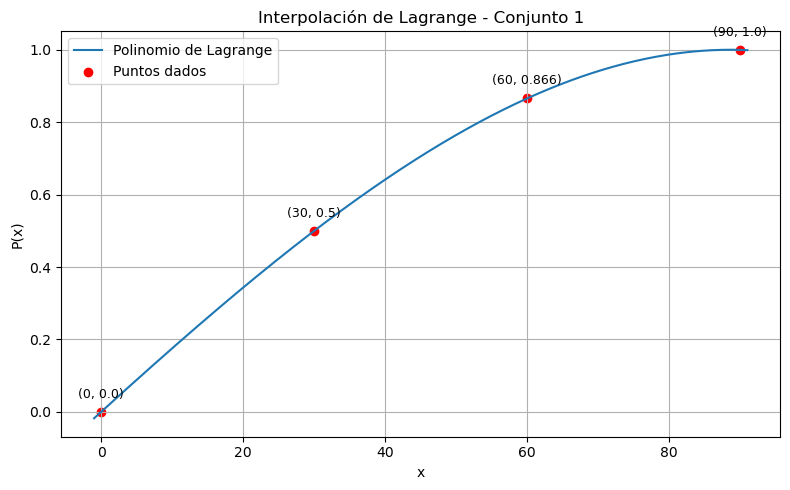

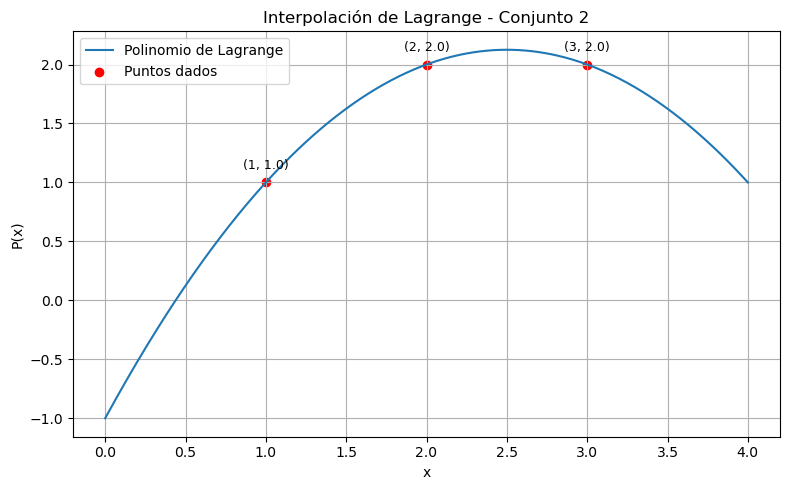

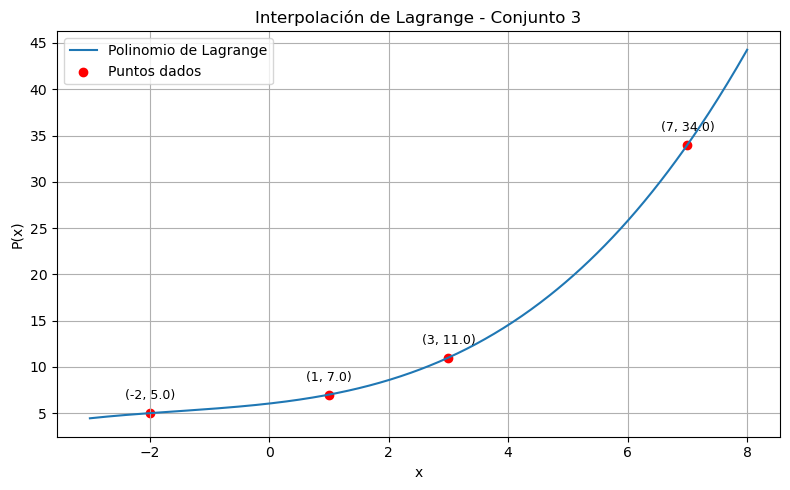

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpol(x_vals, y_vals):
    def L(k, x):
        term = [(x - x_vals[j]) / (x_vals[k] - x_vals[j]) for j in range(len(x_vals)) if j != k]
        return np.prod(term, axis=0)

    def P(x):
        return sum(y_vals[k] * L(k, x) for k in range(len(x_vals)))

    return P

conjuntos = [
    [(0, 0), (30, 0.5), (60, np.sqrt(3) / 2), (90, 1)],
    [(1, 1), (2, 2), (3, 2)],
    [(-2, 5), (1, 7), (3, 11), (7, 34)]
]

for i, puntos in enumerate(conjuntos):
    x_vals, y_vals = zip(*puntos)
    x_interp = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 500)
    P = lagrange_interpol(x_vals, y_vals)
    y_interp = [P(xi) for xi in x_interp]

    plt.figure(figsize=(8, 5))
    plt.plot(x_interp, y_interp, label="Polinomio de Lagrange")
    plt.scatter(x_vals, y_vals, color='red', label="Puntos dados")

    # Anotar cada punto con sus coordenadas
    for x_pt, y_pt in zip(x_vals, y_vals):
        y_interpolado = P(x_pt)
        plt.annotate(f"({x_pt}, {round(y_interpolado, 3)})", 
                     (x_pt, y_pt), 
                     textcoords="offset points", 
                     xytext=(0, 10), 
                     ha='center', fontsize=9)

    plt.title(f"Interpolación de Lagrange - Conjunto {i + 1}")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
